#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 1246, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 1246 (delta 145), reused 154 (delta 122), pack-reused 1041
Receiving objects: 100% (1246/1246), 9.04 MiB | 35.75 MiB/s, done.
Resolving deltas: 100% (654/654), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 27.1 MB/s 
     |████████████████████████████████| 13.1 MB 57.3 MB/s 
     |████████████████████████████████| 2.0 MB 55.4 MB/s 
     |████████████████████████████████| 235 kB 71.8 MB/s 
     |████████████████████████████████| 51 kB 8.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!unzip /content/train_data.zip -d ../custom_dataset

Archive:  /content/train_data.zip
   creating: ../custom_dataset/train_data/
   creating: ../custom_dataset/train_data/images/
   creating: ../custom_dataset/train_data/images/train/
  inflating: ../custom_dataset/train_data/images/train/0a81ec0f-f103-443b-bfe9-1e3dd05306d5_7bacdafe-bf4c-460f-bd0c-991ac1d2d839.jpg  
  inflating: ../custom_dataset/train_data/images/train/0f40c8b4-56bf-4017-b26c-99c9724383a7_a5f4b2fe-c71c-44a2-865b-6ff8b52b221d.jpg  
  inflating: ../custom_dataset/train_data/images/train/1c1df577-9e66-4944-a3df-f6f39d5bb495_37ac7953-28cd-4f85-8293-de7881f5d378.jpg  
  inflating: ../custom_dataset/train_data/images/train/2f092f4d-4f50-41e7-a086-bbd3cd64485b_8a41750b-a64b-402d-ad13-f189f72d0be5.jpg  
  inflating: ../custom_dataset/train_data/images/train/3dd6ae11-bc78-4b68-a76b-453b9722ce64_e1aa6ef0-87a9-4f09-ac5b-73092aa5e1de.jpg  
  inflating: ../custom_dataset/train_data/images/train/4b99fb73-1e6e-4119-82d4-8317a7de32a7_1fb0ac31-0a30-4dc8-840a-a6730e0088fb.jpg  
  infla

# Custom Training Details

There are a number of ways to fine tune training of YOLOv6, like custom configuration files for fine tuning, multi GPU support, and passing custom training arguments.

# Begin Custom Training

We're ready to start custom training.

NOTE: We will modify two of the YOLOv6 training defaults in our custom training example: `epochs` and `image-size`. We will adjust from 400 to 100 epochs in our example for speed. Similarly, we will adjust image size from 600x600 to 416x416, which is the default size for other YOLO models (and makes comparisons easier as well as training slightly faster).


In [ ]:
# run this cell to begin training
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 200 --img-size 416 --data data/dataset.yaml --device 0 

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='data/dataset.yaml', device='0', dist_url='env://', epochs=200, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp1', workers=8, world_size=1)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 200/200 [00:00<00:00, 4512.60it/s]
Train: Checking formats of labels with 2 process(es): 
189 label(s) found, 11 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 200/200 [00:00<00:00, 4422.58it/s]
Train: Final numbers of valid images: 200/ labels: 200. 
0.2s for dataset initialization.
Val: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 50/50 [00:00<00:00, 1480.38it/s]
Val: Checking formats of labels with 2 process(es): 
43 label(s)

# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments.

- --data, type=str, default='./data/coco.yaml', help='dataset.yaml path')
- -weights, type=str, default='./weights/yolov6s.pt', help='model.pt path(s)')
- --batch-size, type=int, default=32, help='batch size')
- --img-size, type=int, default=640, help='inference size (pixels)')
- --conf-thres, type=float, default=0.001, help='confidence threshold')
- --iou-thres, type=float, default=0.65, help='NMS IoU threshold')
- --task, default='val', help='val, or speed')
- --device, default='0', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
- --half, default=False, action='store_true', help='whether to use fp16 infer')
- --save_dir, type=str, default='runs/val/', help='evaluation save dir')
- -name, type=str, default='exp', help='save evaluation results to save_dir/name')

Similar to training, we will pass 416x416 images for evaluation as an example.

In [ ]:
# Run evaluation
!python tools/eval.py --data data/dataset.yaml --img-size 416 --weights runs/train/exp1/weights/best_ckpt.pt --device 0 


Namespace(batch_size=32, conf_thres=0.001, data='data/dataset.yaml', device='0', half=False, img_size=416, iou_thres=0.65, name='exp', save_dir='runs/val/', task='val', weights='runs/train/exp1/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 18.63
Val: Checking formats of labels with 2 process(es): 
43 label(s) found, 7 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 50/50 [00:00<00:00, 3055.96it/s]
Convert to COCO format
100% 50/50 [00:00<00:00, 70563.66it/s]
Convert to COCO format finished. Resutls saved in ../custom_dataset/train_data/ann

# Inference

We can run inference on images of our custom trained model using the provided inference utility.

There are a number of arguments we can adjust:

- --weights, type=str, default='weights/yolov6s.pt', help='model path(s) for inference.')
- --source, type=str, default='data/images', help='the source path, e.g. image-file/dir.')
- --yaml, type=str, default='data/coco.yaml', help='data yaml file.')
- --img-size, type=int, default=640, help='the image-size(h,w) in inference size.')
- --conf-thres, type=float, default=0.25, help='confidence threshold for inference.')
- --iou-thres, type=float, default=0.45, help='NMS IoU threshold for inference.')
- --max-det, type=int, default=1000, help='maximal inferences per image.')
- --device, default='0', help='device to run our model i.e. 0 or 0,1,2,3 or cpu.')
- --save-txt, action='store_true', help='save results to *.txt.')
- --save-img, action='store_false', help='save visuallized inference results.')
- --classes, nargs='+', type=int, help='filter by classes, e.g. --classes 0, or --classes 0 2 3.')
- --agnostic-nms, action='store_true', help='class-agnostic NMS.')
- --project, default='runs/inference', help='save inference results to project/name.')
- -name, default='exp', help='save inference results to project/name.')
- --hide-labels, default=False, action='store_true', help='hide labels.')
- --hide-conf, default=False, action='store_true', help='hide confidences.')
- --half, action='store_true', help='whether to use FP16 half-precision inference.')

We need to pass our custom `.yaml` file so that our label names are correct. We will also pass our `/test` directory to run inference on all images in our test split. In addition, similar to training, we will pass 416x416 images for inference as an example.


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml data/dataset.yaml --img-size 416 --weights runs/train/exp1/weights/best_ckpt.pt --source ../custom_dataset/train_data/images/train --device 0


Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_img=True, save_txt=False, source='../custom_dataset/train_data/images/train', weights='runs/train/exp1/weights/best_ckpt.pt', yaml='data/dataset.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 200/200 [00:08<00:00, 24.18it/s]
Results saved to runs/inference/exp


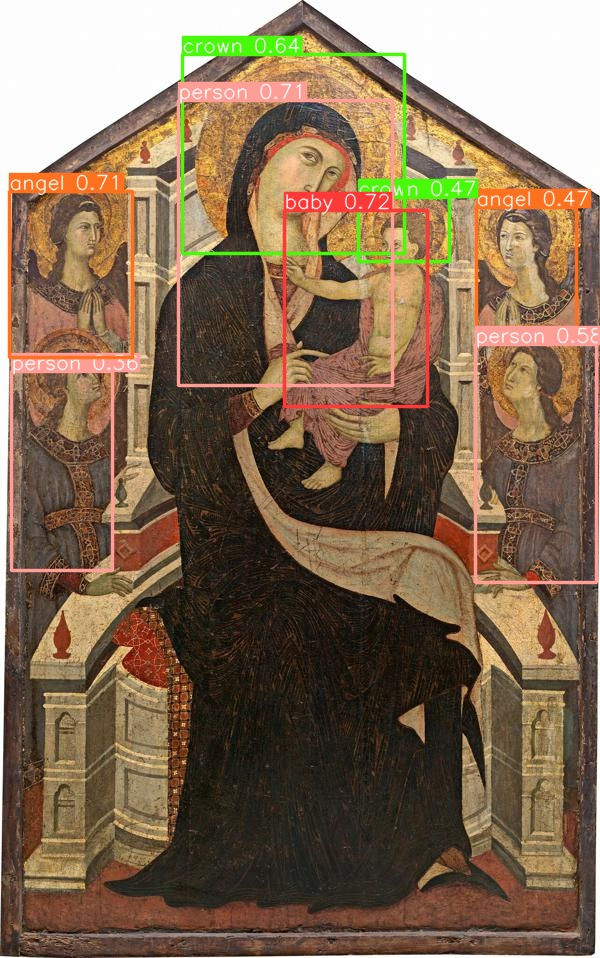

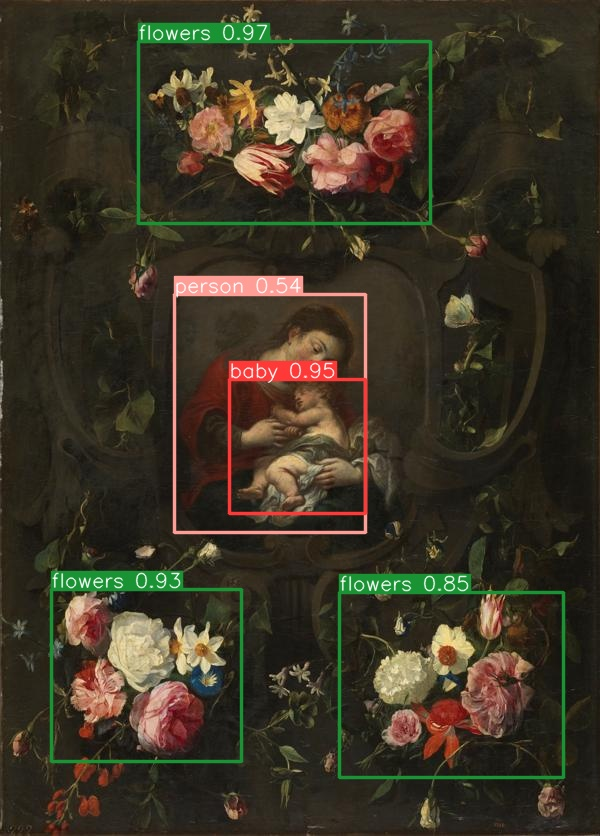

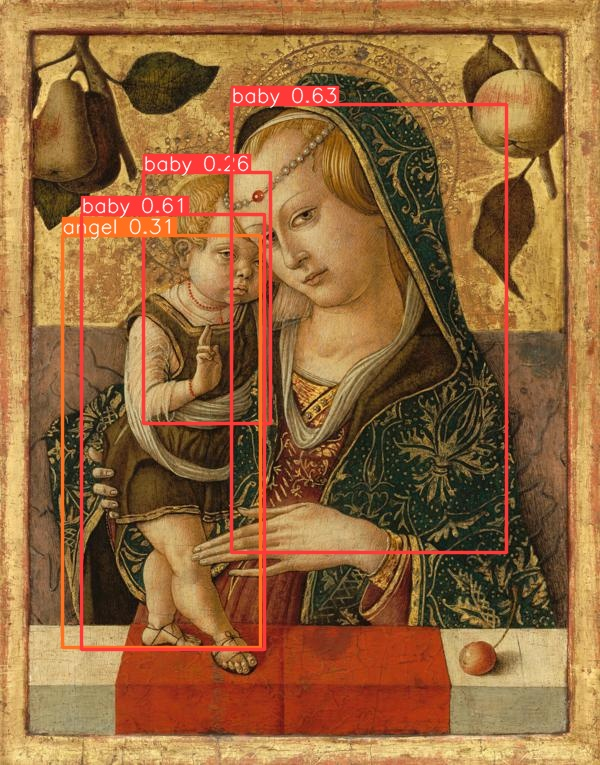

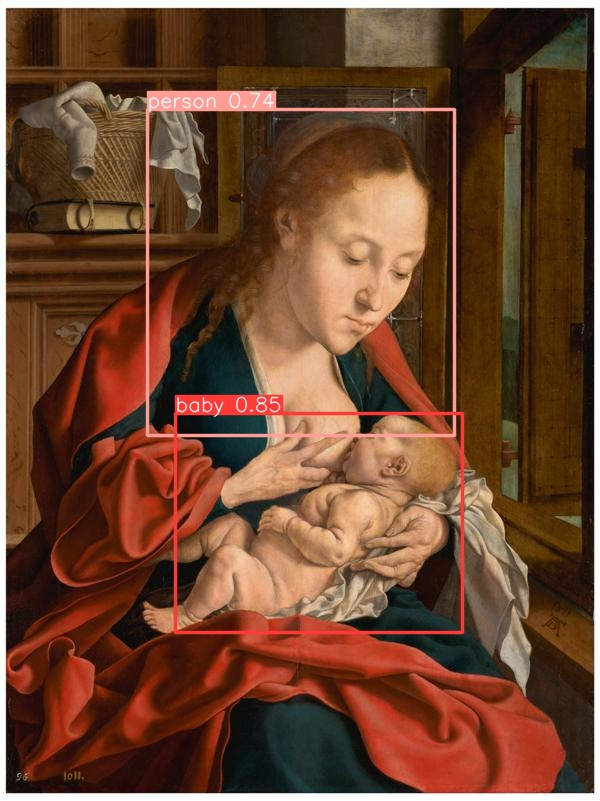

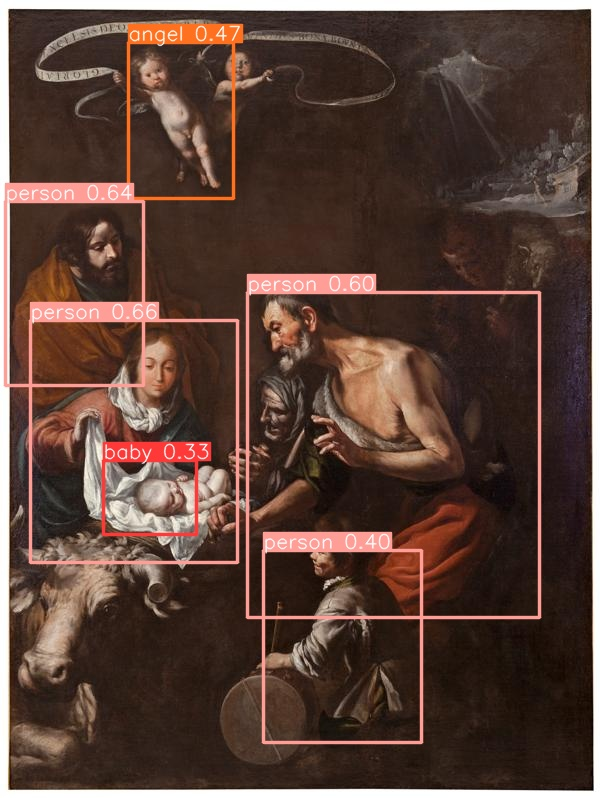

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 5 # max images to print
for imageName in glob.glob('./runs/inference/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive/') 

Mounted at /content/mydrive/


In [ ]:
!python tools/infer.py --yaml data/dataset.yaml --img-size 416 --weights runs/train/exp1/weights/best_ckpt.pt --source ../custom_dataset/train_data/images/val --device 0